In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
order_products__prior = pd.read_csv('order_products__prior.csv')

In [3]:
order_products__prior.head(10)

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
5         2       17794                  6          1
6         2       40141                  7          1
7         2        1819                  8          1
8         2       43668                  9          0
9         3       33754                  1          1

In [4]:
order_products__prior.tail(10)

order_id  product_id  add_to_cart_order  reordered
32434479   3421083        7854                  1          0
32434480   3421083       45309                  2          0
32434481   3421083       21162                  3          0
32434482   3421083       18176                  4          1
32434483   3421083       35211                  5          0
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1

# order_products__prior 를 알아보자
* order_id 는 구매식별번호이며, product_id는 각 구매에 대한 구매물품이 나열되어있다
* 즉, 하나의 구매된 그룹안에 여러개의 구매물품이 존재한다
* 각각의 order_id는 각각의 user_id와 매칭됨을 예상할 수 있다 (user_id는 다른곳에서 merge하는 방향으로 추진 후 확인 할수 있다)
* add_to_cart_order는 구매물품을 갯수를 순차적으로 나열한 것으로 최대값이 곳 각각의 order에 구매된 구매물품의 수를 나타낸다



### order_products__prior['order_id'] 는 orders['order_id'] 에서 eval_set == test & train을 빼놓은 상태

* len(orders['order_id'] = len(order_products__prior['order_id'].unique() + test + train 임을 알수 있다
* 3421083 = 3214874 + 131209 + 75000 
* 현재 order_products__prior에는 train과 test세 사용될 데이터들이 배제되어 있다

In [5]:
print (len(order_products__prior['order_id']))
print (len(order_products__prior['order_id'].unique()))

32434489
3214874


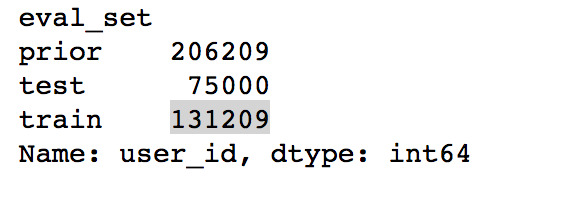

In [6]:
from IPython.display import Image 
Image(filename='example2.png')


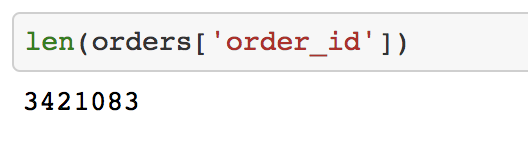

In [7]:
from IPython.display import Image 
Image(filename='example3.png')

# product_id
* instacart에서 user에 의해 구매되는 물품의 총 수를 알수 있다 : 총 49677 개의 아이템 존재
* 이 아이템들은 aisles 안에 속해 있으며, aisles는 다시 크게 departments로 속할 수 있다.
* departments >> aisles >> items 의 카테고리가 존재하며, 각각의 아이템들은 속하는 aisle 또는 department로 분류가 가능하다
* 위의 분류를 구현하기 위해 products.csv 를 aisles.csv 와 departments.csv를 merge 시켜야 한다


In [8]:
len(order_products__prior['product_id'].unique())

49677

### products, aisles, departments 라는 csv 데이터들을 merge 한다: new_df = merged_pad
* 49688개의 아이템이 id로 정의 되어있다
* 134개의 aisles가 id로 정의 되어있다
* 21개의 departments가 id로 정의 되어있다

In [9]:
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [10]:
products.tail()

product_id                                product_name  aisle_id  \
49683       49684   Vodka, Triple Distilled, Twist of Vanilla       124   
49684       49685          En Croute Roast Hazelnut Cranberry        42   
49685       49686                            Artisan Baguette       112   
49686       49687  Smartblend Healthy Metabolism Dry Cat Food        41   
49687       49688                      Fresh Foaming Cleanser        73   

       department_id  
49683              5  
49684              1  
49685              3  
49686              8  
49687             11

In [11]:
aisles.tail()

aisle_id                       aisle
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes

In [12]:
departments.tail()

department_id department
16             17  household
17             18     babies
18             19     snacks
19             20       deli
20             21    missing

In [13]:
merged_pad= pd.merge(left=(pd.merge(left=products,right=aisles)),right=departments)

In [14]:
merged_pad.sort_values('product_id').tail()

product_id                                product_name  aisle_id  \
46968       49684   Vodka, Triple Distilled, Twist of Vanilla       124   
19959       49685          En Croute Roast Hazelnut Cranberry        42   
48383       49686                            Artisan Baguette       112   
37921       49687  Smartblend Healthy Metabolism Dry Cat Food        41   
25484       49688                      Fresh Foaming Cleanser        73   

       department_id                    aisle     department  
46968              5                  spirits        alcohol  
19959              1  frozen vegan vegetarian         frozen  
48383              3                    bread         bakery  
37921              8            cat food care           pets  
25484             11              facial care  personal care

### department 별 item 갯수

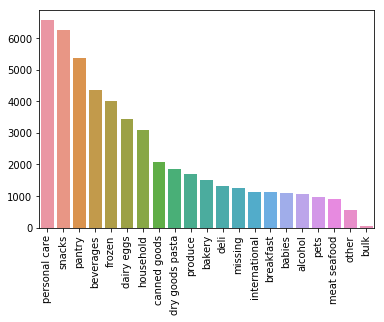

In [81]:
plt.xticks(rotation = 'vertical')
sns.barplot(merged_pad['department'].value_counts().index, merged_pad['department'].value_counts().values)

In [35]:
merged_pad.groupby('department').size().sort_values(ascending = False)

department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
dtype: int64

### aisle 별 item 갯수

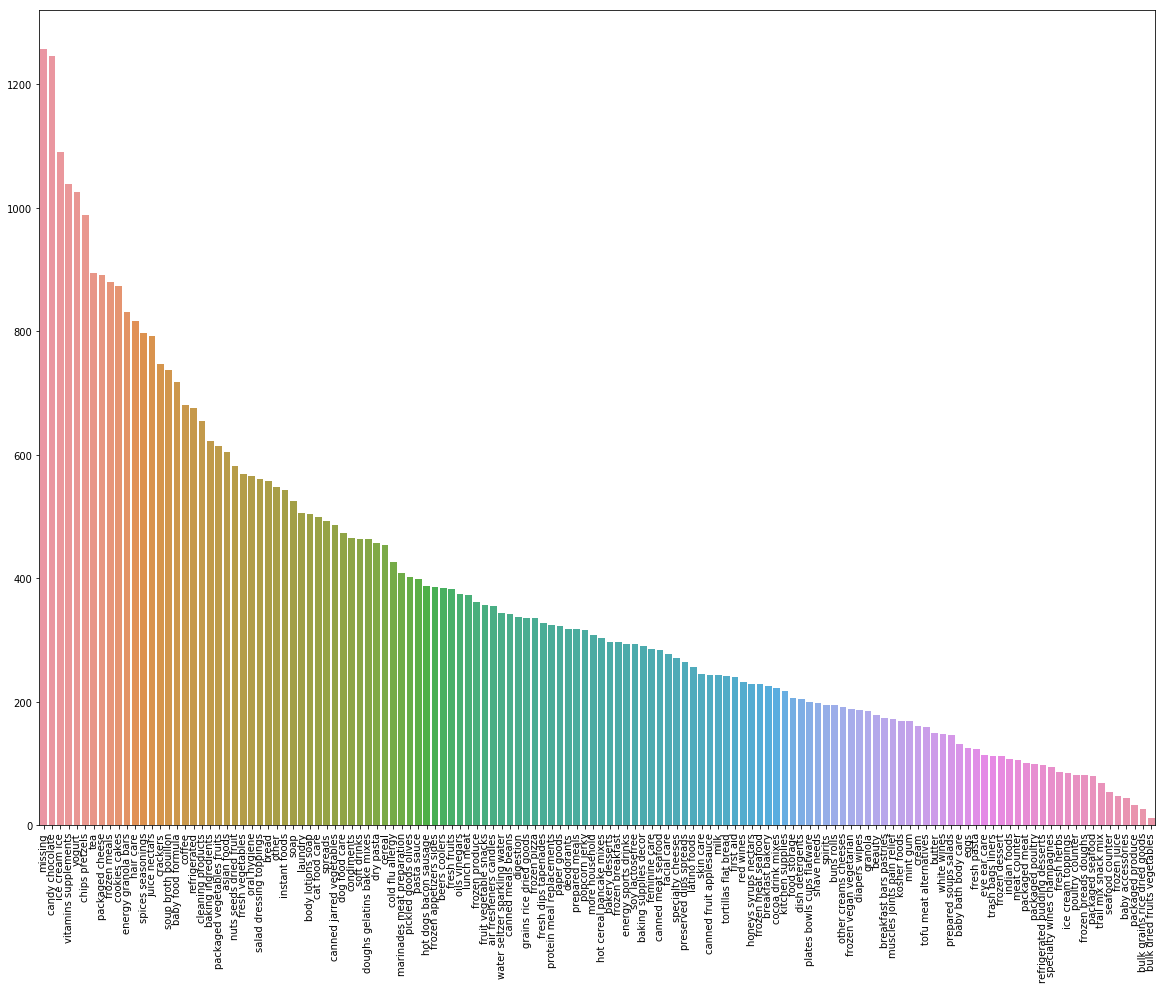

In [76]:
plt.figure(figsize=(20,15))
plt.xticks(rotation = 'vertical')
sns.barplot(merged_pad['aisle'].value_counts().index, merged_pad['aisle'].value_counts().values)

In [85]:
merged_pad.groupby('aisle').size().sort_values(ascending = False).head(10)

aisle
missing                 1258
candy chocolate         1246
ice cream ice           1091
vitamins supplements    1038
yogurt                  1026
chips pretzels           989
tea                      894
packaged cheese          891
frozen meals             880
cookies cakes            874
dtype: int64

# Category: missing
* aisle feature와 department feature에 둘다 존재한다
* 각각, id number 100(aisle) 과 21(department)로 존재한다
* 아이템의 이름을 살펴보니 aisle과 department의 정보가 누락된 것으로 판단; word2vec으로 이미 존재하던 category에 포함시켜야 할것으로 보인다

In [92]:
merged_pad[merged_pad['aisle']=='missing']

product_id                                       product_name  \
42813          38                    Ultra Antibacterial Dish Liquid   
42814          72                          Organic Honeycrisp Apples   
42815         110                             Uncured Turkey Bologna   
42816         297  Write Bros Ball Point Pens, Cap-Pen, Medium (1...   
42817         417         Classics Baby Binks Easter Chocolate Bunny   
42818         437                Strawberry Cheesecake Nonfat Yogurt   
42819         440                      Crossovers Olive Thyme Almond   
42820         472                            Fancy Diced Hot Chilies   
42821         491                                     Pompelmo Water   
42822         556                    Bake & Break Cheese Garlic Loaf   
42823         562                           Traditional Tartar Sauce   
42824         614    Plain Dairy-Free Probiotic Drinkable Cashewgurt   
42825         624                                       Chub Chorizo   
42826         690                       Vegetable Hearty Garden Soup   
42827         768                    Nacho Grain-Free Tortilla Chips   
42828         804                                        Ratatouille   
42829         891                  Liquid Water Enhance Ice Van Java   
42830         991                              Red Sweet Mini Pepper   
42831        1019                             Spicy Bbq Chicken Soup   
42832        1055                    Naturals Grilled Chicken Nugget   
42833        1218                         Buffalo Style Chicken Wrap   
42834        1283             Organic Edamame & Mung Bean Fettuccine   
42835        1302  Natural Orange Flavor Liquid Sublingual Melatonin   
42836        1387   White Apple Cauliflower & Leek Organic Baby Food   
42837        1548                           Organic Vanilla Soy Milk   
42838        1562                         Yellow Easter Basket Cakes   
42839        1715         Organic Honey Balsamic Dressing & Marinade   
42840        1718                           Broccoli Rabe Rapini Bag   
42841        1742                                   Onion Crispbread   
42842        1798                     Paso Robles Cabernet Sauvignon   
...           ...                                                ...   
44041       48583                        Peppermint Liquid Dish Soap   
44042       48649                   Milano Slices Peppermint Cookies   
44043       48663  Organic Date & Lemon Artisan Crisps Made With ...   
44044       48671  Steamfresh Chef's Favorites Broccoli, Cauliflo...   
44045       48738                 Soft & Moist Lemon Zest Madeleines   
44046       48760                            Bursts Grape Soft Drink   
44047       48771            Orange & Ginger Flavored Finest Yoghurt   
44048       48788                           Rainier Chilean Cherries   
44049       48811                                General Tsao's Tofu   
44050       48813                           Lndbrg Wht Jasm Rice 8 Z   
44051       48820  Vanilla Drink Crafted With Authentic Greek Yogurt   
44052       48828                              Popcorn Butter Flavor   
44053       48832                                        Shrimp Ring   
44054       48860                            Hot Cocoa Marsh Creamer   
44055       48865                             Organic Ground Chicken   
44056       48887                      Well Yes! Chicken Noodle Soup   
44057       49017       Peanut Butter Cups Stuffed with Pieces Candy   
44058       49136                 Greek Yogurt Salted Caramel Crunch   
44059       49238             Caribou Blend Medium Roast Coff K Cups   
44060       49357      Complete Care Dishwasher Detergent ActionPacs   
44061       49406  Giant Roll Bath Tissue Essentials Strong Toile...   
44062       49423                               Cinnamon Coffee Cake   
44063       49482      Black Tea With Vanilla Flavor In Pyramid Bags   
44064       49484                Grain Free Cas

In [120]:
from gensim.models.word2vec import Word2Vec

In [211]:
for_word = [list(i.split(" ")) for i in merged_pad['product_name']]

In [212]:
model = Word2Vec(for_word, size = 1000, min_count = 0)

In [95]:
model.init_sims(replace=True)

In [213]:
print(model.most_similar(positive=["Blend"]))

[('Harvest', 0.9938449263572693), ('Anise', 0.9931080937385559), ('Husk', 0.9930559396743774), ('Blueberries', 0.9929332733154297), ('Tiny', 0.9926742911338806), ('Code', 0.9922063946723938), ('Royal', 0.992173969745636), ('Waffles,', 0.9918749332427979), ('Jose', 0.9915786981582642), ('Cloves,', 0.9913506507873535)]


In [226]:
model.most_similar("Ultra")

[('Tide', 0.9956220388412476),
 ('Marinade-in-a-Bag', 0.9943532943725586),
 ('Bleach,', 0.9923256635665894),
 ('Plush', 0.9909276366233826),
 ('Laundry', 0.9908919930458069),
 ('Stack', 0.9903637766838074),
 ('Wakame,', 0.990231454372406),
 ('Rotisserie', 0.9901896715164185),
 ('Smoke', 0.9901537299156189),
 ('Italia', 0.9901072978973389)]

In [221]:
for i in range(42813,44071):
    a = merged_pad[merged_pad['aisle']=='missing']['product_name'][i].split(" ")
    for j in a:
        similar_word = model.most_similar('{}'.format(j))[0][0]
        for i in range(0,42813):
            words = list(merged_pad['product_name'][i].split(" "))
            if similar_word in words:
                print(j, merged_pad['aisle'][i], merged_pad['department'][i])

Ultra laundry household
Ultra laundry household
Ultra laundry household
Ultra laundry household
Antibacterial energy granola bars snacks
Antibacterial energy granola bars snacks
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial baking supplies decor pantry
Antibacterial juice nectars beverages
Antibacterial cold flu allergy personal care
Antibacterial cold flu allergy personal care
Antibacterial cold flu allergy personal care
Antibacterial oral hygiene personal care
Antibacterial oral hygiene personal care
Antibact

Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household


Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad dressing toppings pantry
Turkey salad

Bologna frozen meals frozen
Bologna frozen meals frozen
Bologna frozen meals frozen
Bologna frozen meals frozen
Bologna frozen meals frozen
Bologna frozen meals frozen
Bologna frozen appetizers sides frozen
Bologna frozen breakfast frozen
Bologna packaged cheese dairy eggs
Write crackers snacks
Write frozen produce frozen
Write frozen produce frozen
Write frozen produce frozen
Write pasta sauce dry goods pasta
Write pasta sauce dry goods pasta
Write pasta sauce dry goods pasta
Write fresh fruits produce
Bros oral hygiene personal care
Bros oral hygiene personal care
Bros oral hygiene personal care
Bros oral hygiene personal care
Bros oral hygiene personal care
Bros oral hygiene personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros first aid personal care
Bros firs

Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate specialty cheeses dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy l

Strawberry frozen breakfast frozen
Strawberry frozen breakfast frozen
Strawberry frozen juice frozen
Strawberry oral hygiene personal care
Strawberry oral hygiene personal care
Strawberry vitamins supplements personal care
Strawberry body lotions soap personal care
Strawberry protein meal replacements personal care
Strawberry protein meal replacements personal care
Strawberry protein meal replacements personal care
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
Strawberry yogurt dairy eggs
S

Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs
Yogurt yogurt dairy eggs


Thyme fresh herbs produce
Thyme fresh herbs produce
Almond candy chocolate snacks
Almond candy chocolate snacks
Almond candy chocolate snacks
Almond candy chocolate snacks
Almond candy chocolate snacks
Almond protein meal replacements personal care
Fancy chips pretzels snacks
Fancy chips pretzels snacks
Fancy spices seasonings pantry
Fancy preserved dips spreads pantry
Fancy condiments pantry
Fancy condiments pantry
Fancy water seltzer sparkling water beverages
Fancy water seltzer sparkling water beverages
Fancy water seltzer sparkling water beverages
Fancy coffee beverages
Fancy coffee beverages
Fancy coffee beverages
Fancy frozen dessert frozen
Fancy frozen dessert frozen
Fancy frozen pizza frozen
Fancy frozen breads doughs frozen
Fancy frozen meat seafood frozen
Fancy ice cream ice frozen
Fancy frozen vegan vegetarian frozen
Fancy frozen vegan vegetarian frozen
Fancy yogurt dairy eggs
Fancy packaged cheese dairy eggs
Fancy packaged cheese dairy eggs
Fancy packaged cheese dairy eggs


Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins s

Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake salad dressing toppings pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vinegars pantry
Bake oils vine

Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips pretzels snacks
Cheese chips p

Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese package

Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
Garlic nuts seeds dried fruit snacks
G

Traditional packaged cheese dairy eggs
Traditional packaged cheese dairy eggs
Traditional packaged cheese dairy eggs
Traditional packaged cheese dairy eggs
Traditional packaged cheese dairy eggs
Traditional packaged cheese dairy eggs
Traditional packaged cheese dairy eggs
Traditional other creams cheeses dairy eggs
Traditional fresh pasta dry goods pasta
Traditional fresh pasta dry goods pasta
Tartar ice cream ice frozen
Sauce chips pretzels snacks
Sauce crackers snacks
Sauce crackers snacks
Sauce crackers snacks
Sauce spices seasonings pantry
Sauce preserved dips spreads pantry
Sauce frozen meals frozen
Sauce frozen meals frozen
Sauce frozen meals frozen
Sauce frozen produce frozen
Sauce food storage household
Sauce food storage household
Sauce baby food formula babies
Sauce poultry counter meat seafood
Sauce packaged poultry meat seafood
Sauce grains rice dried goods dry goods pasta
Sauce grains rice dried goods dry goods pasta
Sauce grains rice dried goods dry goods pasta
Sauce grai

Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon

Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon canned goods
Sauce soup broth bouillon

Cashewgurt cocoa drink mixes beverages
Cashewgurt frozen produce frozen
Cashewgurt frozen produce frozen
Cashewgurt frozen produce frozen
Cashewgurt ice cream ice frozen
Cashewgurt ice cream ice frozen
Cashewgurt vitamins supplements personal care
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy eggs
Cashewgurt yogurt dairy egg

Garden frozen meals frozen
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Garden soup broth bouillon canned goods
Soup ice cream toppings snacks
Soup ice cream toppings snacks
Soup ice cream toppings snacks


Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condim

Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup fresh pasta dry goods pasta
Soup fresh pasta dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup dog food care pets
Soup dog food 

Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household


Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins supplements personal care
Water vitamins s

Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks


Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels snacks
Sweet chips pretzels

Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce d

Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen appetizers sides frozen
Spicy frozen appetizers sides frozen
Spicy baby food formula babies
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pas

Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup bro

Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condiments pantry
Soup condim

Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup pasta sauce dry goods pasta
Soup fresh pasta dry goods pasta
Soup fresh pasta dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods dry goods pasta
Soup instant foods 

Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup bro

Style specialty cheeses dairy eggs
Style specialty cheeses dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style packaged cheese dairy eggs
Style 

Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup bro

& frozen breakfast frozen
& frozen breakfast frozen
& packaged cheese dairy eggs
& other creams cheeses dairy eggs
& other creams cheeses dairy eggs
& other creams cheeses dairy eggs
& other creams cheeses dairy eggs
& other creams cheeses dairy eggs
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& pasta sauce dry goods pasta
& fresh pasta dry goods pasta
& instant foods dry goods pasta
& instant foods dry goods pasta
& canned jarred vegetables canned goods
& canned jarred vegetables canned goods
& canned jarred vegetables canned goods
& canned jarred vegetables canned goods
& canned jarred vegetables canned goods
& soup broth bouillon canned goods
& soup broth bouillon canned g

Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water 

Liquid more household household
Liquid more household household
Liquid more household household
Liquid more household household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry household
Liquid laundry househo

Melatonin cold flu allergy personal care
Melatonin cold flu allergy personal care
Melatonin cold flu allergy personal care
Melatonin cold flu allergy personal care
Melatonin cold flu allergy personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements personal care
Melatonin vitamins supplements

White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White condiments pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White pickled goods olives pantry
White tea beverages
White tea beverages
White te

& trail mix snack mix snacks
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& spices seasonings pantry
& marinades meat preparation pantry
& marinades meat preparation pantry
& marinades meat preparation pantry
& marinades meat preparation pantry
& marinades meat preparation pantry
& salad dressing toppings pantry
& salad dressing toppings pantry
& salad dressing toppings pantry
& salad dressing toppings pantry
& spreads pantry
& spreads pantry
& preserved dips spreads pantry
& preserved dips spreads pantry
& preserved dips spreads pantry
& preserved dips spreads pantry
& preserved dips spreads pantry
& preserved dips spreads pantry
&

Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food care pets
Food cat food ca

Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookies cakes snacks
Vanilla cookie

Yellow frozen vegan vegetarian frozen
Yellow packaged meat meat seafood
Yellow grains rice dried goods dry goods pasta
Yellow canned jarred vegetables canned goods
Yellow soup broth bouillon canned goods
Yellow soup broth bouillon canned goods
Yellow canned meals beans canned goods
Yellow packaged vegetables fruits produce
Yellow packaged vegetables fruits produce
Yellow packaged vegetables fruits produce
Yellow packaged vegetables fruits produce
Yellow packaged vegetables fruits produce
Yellow packaged vegetables fruits produce
Yellow packaged vegetables fruits produce
Easter cookies cakes snacks
Easter cookies cakes snacks
Easter candy chocolate snacks
Easter candy chocolate snacks
Easter baking supplies decor pantry
Easter frozen dessert frozen
Easter cold flu allergy personal care
Easter body lotions soap personal care
Easter body lotions soap personal care
Easter hair care personal care
Easter hair care personal care
Easter hair care personal care
Easter hair care personal care
Ea

Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
Dressing fresh pasta dry goods pasta
D

Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli instant foods dry goods pasta
Broccoli soup broth bouillon canned goods
Broccoli soup broth bouillon canned goods
Rabe cookies cakes snacks
Rabe cookies cakes snacks
Rabe chips pretzels snacks
Rabe crackers snacks
Rabe crackers snacks
Rabe tea beverages
Rabe tea beverages
Rabe soft drinks beverages
Rabe soft drinks beverages
Rabe cocoa drink mixes beverages
Rabe cocoa drink mixes beverages
Rabe frozen meals frozen
Rabe frozen meals frozen
Rabe frozen meals frozen
Rabe frozen meals frozen
Rabe frozen meals frozen
Rabe frozen produce frozen
Rabe frozen meat seafood frozen
Rabe ice cream ice frozen
Rabe frozen vegan vegetarian frozen
R

Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate cookies cakes snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy

Chocolate shave needs personal care
Chocolate shave needs personal care
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate yogurt dairy eggs
Chocolate specialty cheeses dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate packaged cheese dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy egg

Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
Chocolate energy granola bars snacks
C

Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate soy lactosefree dairy eggs
Chocolate milk dairy eggs
Chocolate milk dairy eggs
Chocolate milk dairy eggs
Chocolate milk dairy eggs
Chocolate milk dairy eggs
Chocolate cream dairy eggs
Chocolate cream dairy eggs
Chocolate cream dairy eggs
Chocolate cream dairy eggs
Chocolate cream dairy eggs
Chocolate butter dairy eggs
Chocolate refrigerated pudding desserts dairy eggs
Chocolate refrigerated pudd

Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge ice cream ice frozen
Fudge yogurt dairy eggs
Fudge yogurt dairy eggs
Fudge yogurt dairy eggs
Fudge soy lactosefree dairy eggs
Fudge milk dairy eggs
Fudge cre

Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks
Ice cookies cakes snacks


Orange juice nectars beverages
Orange juice nectars beverages
Orange juice nectars beverages
Orange juice nectars beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling water beverages
Orange water seltzer sparkling

Cereal body lotions soap personal care
Cereal body lotions soap personal care
Cereal body lotions soap personal care
Cereal body lotions soap personal care
Cereal protein meal replacements personal care
Cereal beauty personal care
Cereal soap personal care
Cereal soap personal care
Cereal soap personal care
Cereal soap personal care
Cereal soap personal care
Cereal soap personal care
Cereal shave needs personal care
Cereal yogurt dairy eggs
Cereal yogurt dairy eggs
Cereal yogurt dairy eggs
Cereal soy lactosefree dairy eggs
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formula babies
Cereal baby food formul

Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold energy granola bars snacks
Cold chips pretzels snacks
Cold chips pretzels snacks
Cold crackers snacks
Cold crackers snacks
Cold crackers snacks
Cold crackers snacks
Cold popcorn jerky snacks
Cold fruit vegetable snacks snacks
Cold fruit vegetable snacks snacks
Cold candy chocolate snacks
Cold candy chocolate snacks
Cold candy chocolate snacks
Cold candy chocolate snacks
Cold candy chocolate snacks
Cold candy chocolate snacks
Cold mint gum snacks
Cold mint gum snacks
Cold nuts seeds dried fruit snacks
Cold mari

Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew tea beverages
Brew juice nectars beverages
Brew juice nectars beverages
Brew refrigerated beverages
Brew refrigerated beverages
Brew refrigerated beverages
Brew refrigerated beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew coffee beverages
Brew frozen dessert frozen
Brew ice cream ice frozen
Brew ice cream ice frozen
Brew ice cream ice frozen
Brew protein meal replacements personal care
Brew protein meal replacements personal care
Brew yogurt dairy eggs
Brew specialty c

Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped canned jarred vegetables canned goods
Chopped fresh vegetables produce
Chopped fresh vegetables produce
BBQ popcorn jerky snacks
BBQ popcorn jerky snacks
BBQ popcorn jerky snacks
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ spices seasonings pantry
BBQ marinades meat preparation pan

Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured pickled goods olives pantry
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen produce frozen
Uncured frozen pizza frozen
Uncured frozen meat seafood frozen
Uncured frozen meat seafood frozen
Uncured frozen appetizers sides frozen
Uncured frozen appetizers sides frozen
Uncured yogurt dairy eggs
Uncured specialty cheeses dair

Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef frozen meat seafood frozen
Beef ice cream ice frozen
Beef frozen appetizers sides frozen
Beef frozen appetizers sides frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen
Beef frozen breakfast frozen

Hot packaged cheese dairy eggs
Hot packaged cheese dairy eggs
Hot packaged cheese dairy eggs
Hot packaged cheese dairy eggs
Hot soy lactosefree dairy eggs
Hot refrigerated pudding desserts dairy eggs
Hot hot dogs bacon sausage meat seafood
Hot instant foods dry goods pasta
Hot instant foods dry goods pasta
Hot instant foods dry goods pasta
Hot instant foods dry goods pasta
Hot instant foods dry goods pasta
Hot instant foods dry goods pasta
Hot granola breakfast
Hot canned jarred vegetables canned goods
Hot canned jarred vegetables canned goods
Hot canned jarred vegetables canned goods
Hot soup broth bouillon canned goods
Hot soup broth bouillon canned goods
Hot canned meals beans canned goods
Hot fresh fruits produce
Dog body lotions soap personal care
Dog body lotions soap personal care
Dog hair care personal care
Dog beauty personal care
Dog facial care personal care
Dog facial care personal care
Dog facial care personal care
Dog facial care personal care
Dog facial care personal car

Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese crackers snacks
Cheese popcorn jerky snacks
Cheese popcorn jerky snacks
Cheese popcorn jerky snacks
Cheese popcorn jerky snacks
Cheese popcorn jerky snacks
Cheese popcorn jerky snacks
Cheese popcorn jerky snacks

Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese other creams cheeses dairy eggs
Cheese other creams cheeses dairy eggs
Cheese other creams cheeses dairy eggs
Cheese other creams cheeses dairy

Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen meals frozen
Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen pizza frozen
Spicy frozen appetizers sides frozen
Spicy frozen appetizers sides frozen
Spicy baby food formula babies
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry goods pasta
Spicy pasta sauce dry

Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup broth bouillon canned goods
Chicken soup bro

Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccolli popcorn jerky snacks
Broccoll

Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dairy eggs
Broccolli butter dai

Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic pasta sauce dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic fresh pasta dry goods pasta
Garlic instant foods dry goods pasta
Garlic instant foods dry goods pasta
Garlic instant foods dry goods pasta
Garlic instant foods dry goods pasta
Garlic instant foods dry goods pasta
Garlic instant foods dry goods pasta
Garlic instant foods dry goods pasta
Garlic

& fresh vegetables produce
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb chips pretzels snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb crackers snacks
Herb popcorn jerky snacks
Herb spices seasonings pantry
Herb marinades meat preparation pantry
Herb marinades meat preparation pantry
Herb salad dressing toppings pantry
Herb salad dressing toppings pantry
Herb salad dressing toppings pantry
Herb salad dressing toppings pantry
Herb salad dressing toppings pantry
He

Jack frozen vegan vegetarian frozen
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack packaged cheese dairy eggs
Jack cream dairy eggs
Jack cream dairy eggs
Jack poultry counter meat seafood
Jack poultry counter meat seafood
Jack poultry counter meat seafood
Jack packaged poultry meat seafood
Jack packaged poultry meat seafood
Jack packaged poultry meat seafood
Jack packaged poultry meat seafood
Jack hot dogs bacon sausage meat seafood
Jack hot dogs bacon sausage meat seafood
Jack hot dogs bacon sausage meat seafood
Jack hot dogs bacon sausage meat seafood
Ja

Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meals frozen
Cheese frozen meat seafood frozen
Cheese frozen meat seafood frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides frozen
Cheese frozen appetizers sides fro

Cheese baby food formula babies
Cheese baby food formula babies
Cheese baby food formula babies
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese hot dogs bacon sausage meat seafood
Cheese packaged meat meat seafood
Cheese packaged meat meat seafood
Cheese meat counter meat seafood
Cheese grains rice dried goods dry goods pasta
Cheese dry pasta dry goods pasta
Cheese dry pasta dry goods pasta
Cheese pasta sauce dry goods pasta
Cheese pasta sauce dry goods pasta
Cheese pasta sauce dry goods pasta
Cheese pasta sauce dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods 

Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce dry goods pasta
Pepper pasta sauce d

Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of body lotions soap personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal care
Of hair care personal 

Cheddar frozen breads doughs frozen
Cheddar frozen breads doughs frozen
Cheddar frozen meat seafood frozen
Cheddar frozen meat seafood frozen
Cheddar frozen meat seafood frozen
Cheddar frozen meat seafood frozen
Cheddar frozen meat seafood frozen
Cheddar frozen meat seafood frozen
Cheddar ice cream ice frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers sides frozen
Cheddar frozen appetizers 

Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged cheese dairy eggs
Cheddar packaged che

Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar instant foods dry goods pasta
Cheddar inst

Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese packaged cheese dairy eggs
Cheese package

Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese instant foods dry goods pasta
Cheese dog food care pets
Cheese dog food care pets
Cheese dog food care pets
Cheese cat food care pets
Cheese cat food care pets
Cheese cat food car

KeyboardInterrupt: 

In [197]:
for i in merged_pad['product_name']:
    print (list(i.split(" ")))

['Chocolate', 'Sandwich', 'Cookies']
['Nutter', 'Butter', 'Cookie', 'Bites', 'Go-Pak']
['Danish', 'Butter', 'Cookies']
['Gluten', 'Free', 'All', 'Natural', 'Chocolate', 'Chip', 'Cookies']
['Mini', 'Nilla', 'Wafers', 'Munch', 'Pack']
['Organic', 'Lemon', 'Gingersnap']
['Chips', 'Ahoy!', 'Chewy', 'Cookies']
['Cookie', 'Chips', 'Crunchy', 'Dark', 'Chocolate', 'Chocolate', 'Chip', 'Cookies']
['Golden', 'Cupcakes', '8', 'Pack']
['Crunch', 'Vanilla', 'Sugar', 'Mini', 'Cookies']
['Vanilla', 'Sugar', 'Cookies']
['Fudge', 'Brownies', 'with', 'English', 'Walnuts']
['Low', 'Fat', 'Honey', 'Graham', 'Crackers']
['Little', 'Bites', 'Snickerdoodle', 'Muffins']
['Keebler', 'Sandies', 'Cashew', '12.8', 'Oz']
['Cinnamon', "Pop'ettes"]
['Chocolate', "Reese's", 'Peanut', 'Butter', 'Cup', 'Creme', 'Oreo']
['Pure', 'Butter', 'Shortbread', 'Scottie', 'Dogs']
['Organic', 'Family', 'Recipe', 'Chocolate', 'Chip', 'Cookies']
['Pecan', 'Sandies', 'Simply', 'Sandies']
['Mini', 'Strawberry', 'Donuts']
['Spring', '

['Multi-Grain', 'Splits', 'Pretzels']
['Baked', 'Rice', 'and', 'Corn', 'Puffs,', 'Aged', 'White', 'Cheddar']
['Santa', 'Fe', 'Barbecue', 'Rice', 'Chips', 'MWO', 'Rice', 'Chips']
['Cool', 'Ranch', 'Chips']
['Real', 'Vegetable', 'Chips', 'Sweets', '&', 'Carrots']
['Specials', 'Sourdough', 'Pretzels']
['Dark', 'Chocolate', 'Pretzels', 'with', 'Sea', 'Salt']
['Sweet', 'Potato', 'Chips']
['New', 'Orleans', 'Kettle', 'Style', 'Salt', '&', 'Vinegar', 'Potato', 'Chips']
['Green', 'Bean', 'Chips']
['Pita', 'Chips,', 'Simply', 'Naked,', 'Party', 'Size']
['Gluten', 'Free', 'Honey', 'Mustard', 'Pretzels']
['Vegetable', 'Chips,', 'Taro,', 'Sea', 'Salt']
['Tortillas', 'Southwestern', 'Ranch', 'Tortilla', 'Crisps']
['Organic', 'Fuji', 'Red', 'Apple', 'Chips']
['Organic', 'Ancient', 'Spice', 'Thins']
['Gluten', 'Free', 'Sesame', 'Ring', 'Pretzels']
['Lemon', '&', 'Olive', 'Oil', 'Kale', 'Chips']
['Party', 'Mix', 'Barrel']
['All', 'Natural', 'Pressels', 'Pretzel', 'Chips', 'Everything']
['Special', 'Re

['Milk', 'Chocolate', 'Gold', 'Bunny', '-', '5', 'CT']
['Almonds', '&', 'Sea', 'Salt', 'in', 'Dark', 'Chocolate']
['Sticks', 'Candy', 'Bar']
['70%', 'Dark', 'Chocolate', 'Candy', 'Bar', 'with', 'Raspberries']
['Dark', 'Chocolate', 'Chips']
['Cocomels', 'Original']
['Lindor', 'Truffles']
['Salted', 'Caramel', 'Organic', 'Dark', 'Chocolate,', '57%', 'Cocoa']
['Red', 'Vines', 'Candy']
['Crispety,', 'Crunchety', 'Peanut', 'Buttery', 'Candy', 'Chocolate', 'Candy', 'Pieces']
['Truffles,', 'Organic,', 'Hippie', 'Hemp']
['Dark', 'Coconut', 'Toffee', 'Organic', 'Chocolate']
['Butterfinger', 'Chocolate', 'Chocolates']
['Sour', 'Chewy', 'Candy']
['Fruit', 'Snacks', 'Banana,', 'Cherry,', 'Peach', '&', 'Strawberry', 'Snack', 'Packs']
['Candy', 'Pieces', 'Made', 'of', 'Milk', 'Chocolate', 'with', 'Crisped', 'Rice', 'Mixed', 'In', 'Chocolate', 'Candy', 'Bar']
['Chocolate']
['Natural', 'Dark', 'Chocolate', 'Espresso', 'Beans']
['Organic', 'Fair', 'Trade', '70%', 'Dark', 'Chocolate', 'with', 'Sea', 'Sa

['Guacamole', 'Ranch', 'Salad', 'Dressing']
['Italian', 'with', 'Sun', 'Dried', 'Tomato', 'Dressing']
['Creamy', 'Chipotle', 'Ranch', 'Dressing']
['Tamari', 'Ginger', 'Asian', 'Dressing']
['OPA', 'Greek', 'Yogurt', 'Blue', 'Cheese', 'Dressing']
['Homestyle', 'Ranch']
['Chunk', 'Bleu', 'Cheese', 'Dressing', 'and', 'Dip']
['Lightly', 'Salted', 'Tortilla', 'Strips']
['Dips', 'Original', 'Ranch', 'Mix']
['Miso', 'Dressing']
['Robusto', 'Italian', 'Dressing']
['Asian', 'Sesame', 'Dressing']
['Home', 'Style', 'Champagne', 'Caper', 'Vinaigrette', 'Dressing']
['Seasoned', 'Garlic', '&', 'Romano', 'Croutons']
['Spinach', 'Salad', 'Dressing']
['Blue', 'Cheese', 'Dressing']
['Artisan', 'Vinaigrette', 'Cherry', 'Balsamic', '&', 'Rosemary']
['Green', 'Goddess', 'Dressing']
['Cotija', 'Cilantro', 'Dressing', '&', 'Dip']
['Cheese', '&', 'Garlic', 'Texas', 'Toast', 'Croutons']
['Organic', 'Italian', 'Vinaigrette']
['Vegan', 'Lemon', 'Herb', 'Salad', 'Dressing']
['House', 'Italian']
['Caesar', 'Vinaigr

['Olives', 'Stuffed', 'With', 'Blue', 'Cheese']
['Stackers', 'Kosher', 'Dill', 'Pickles']
['Kosher', 'Dill', 'Spears', 'Made', 'with', 'Sea', 'Salt']
['Mini', 'Stuffers', 'Hamburger', 'Dill', 'Chips']
['Hamburger', 'Dill', 'Pickle', 'Chips']
['Olive', 'Snack', 'Pitted', 'Green', 'Olives']
['Kraut']
['Cucumber', 'Pickles', 'in', 'Brine']
['Garlic', 'Stuffed', 'Olives']
['Whole', 'Dills']
['Hamburger', 'Dill', 'Chips', 'Pickles']
['Stackers', 'Bread', '&', 'Butter', 'Pickles']
['Sliced', 'Peperoncini']
['Crispy', 'Sauerkraut']
['Olives,', 'Spanish,', 'Manzanillas,', 'Stuffed', 'with', 'Minced', 'Pimiento']
['Dill', 'Pickle', 'Spears']
['Medium', 'Pitted', 'California', 'Ripe', 'Olives']
['Zesty', 'Bread', '&', 'Butter', 'Chips', 'Pickles']
['Organic', 'Jalapeno', 'Peppers', 'Stuff', 'Green', 'Olives']
['Raw', 'Sea', 'Kraut']
['Pickled', 'Asparagus']
['Dill', 'Sandwich', 'Pickle', 'Slices']
['Premium', 'Capers']
['Red', 'Pepper', 'Stuffed', 'Green', 'Olives']
['Organic', 'Garlic', 'Dill',

['Sparkling', 'Apple', 'Cider']
['Berry', '100%', 'Juice']
['Light', 'White', 'Grape', 'Juice', 'Drink']
['Lifewater', '0', 'Cal', 'Blood', 'Orange', 'Mango', 'Vitamin', 'Enriched', 'Water']
['Diet', 'Cranberry', 'Raspberry', 'Juice', 'Drink']
['100%', 'Juice', 'Grape']
['Apricot', 'Mango', 'Juice']
['Coconut', 'Water', 'with', 'Peach', '&', 'Mango']
['Organic', 'Apple', 'Cider']
['Organic', 'Orange', 'Mango', 'Juice']
['Cran-Pomegranate', 'Light', '50', 'Calorie', 'Juice']
['Coconut', 'Water,', 'with', 'Pulp']
['Pear', 'Juice', 'Drink']
['Pure', 'Black', 'Cherry', 'Juice']
['Premium', 'Organic', 'Coconut', 'Water']
['Organic', 'Quenchers', 'Berrylicious', 'Lemonade']
['Diet', 'Blackberry', 'Lemonade']
['V', 'Fusion', 'Strawberry', 'Banana', '100%', 'Vegetable', '&', 'Fruit', 'Juice']
['Pure', 'Organic', 'Coconut', 'Water']
['Pear', 'Sparkling', 'Juice', 'Beverage']
['Coconut', 'Water,', 'Real']
['Pineapple', 'Flavored', 'Coconut', 'Water']
['Brewed', 'Green', 'Tea', 'Iced', 'Tea']
['T

['Beef', 'and', 'Broccoli']
['Homestyle', 'Beef', 'Skillet']
['Ricotta', '&', 'Lobster', 'Ravioli', 'Classic', 'Meal', 'for', '2']
['Broccoli', 'Cauliflower', 'Pasta']
['Fettuccine', 'Alfredo', 'with', 'Chicken', '&', 'Broccoli']
['Fettucini', 'Alfredo', 'Savory', 'Italian', 'Recipes']
['Thai', 'Red', 'Curry', 'With', 'Rice', '&', 'Vegetables']
['Vegetable', 'Enchilada']
['Street', 'Wrap', 'Chicken', 'Tikka', 'Masala']
['Lean', 'Gourmet', 'Buffalo', 'Style', 'Chicken', 'Snackers']
['Chicken,', 'Broccoli', '&', 'Cheese', 'Casserole']
['Light', 'Sodium', 'Mexican', 'Casserole', 'Bowl']
['Black', 'Bean', 'Tamale', 'Verde']
['Beef', 'Chile', 'Colorado']
['Culinary', 'Collection', 'Herb', 'Roasted', 'Chicken']
['Café', 'Steamers', '100%', 'Natural', 'Tortellini', 'Primavera', 'Parmesan']
['Garden', 'Veggie', 'Burger']
['Chicken', 'Fried', 'Rice']
['Amy', 'Indian', 'Mattar', 'Paneer', 'Light', 'In', 'Sodium']
['Comfort', 'Bakes', 'Cheesy', 'Chicken', 'Lasagna']
['Slow', 'Roasted', 'Beef']
['

['Toaster', 'Scrambles', 'Sausage']
["Brown'N", 'Serve', 'Sausage', 'Links', 'Lite', 'Original', '-', '10', 'CT']
['Baja', 'Breakfast', 'Burrito']
['Eggo', 'Bites', 'Chocolatey', 'Chip', 'Pancakes']
['Sensible', 'Foods', 'Asian', 'Veggie', 'Burgers']
['Natural', 'Classic', 'Pork', 'Breakfast', 'Sausage']
['Organic', 'Homestyle', 'Mini', 'Waffles']
['Organic', 'Multigrain', 'Waffles']
['Frozen', 'Swiss', 'And', 'Bacon', 'Petite', 'Quiche', 'Lorraine']
['Breakfast', 'Bacon', 'Egg', '&', 'Cheese', 'Mini', 'Bagels']
['Mini', 'Whole', 'Grain', 'Waffles']
['Chocolate', 'Belgian', 'Waffles']
['Brown', "'N", 'Serve', 'Turkey', 'Sausage', 'Links']
['Turkey', 'Sausage', 'Scramble']
['Original', 'Pancakes', '&', 'Sausage', 'On', 'a', 'Stick']
['Turkey', 'sausage', 'with', 'egg', 'whites', 'and', 'reduced', 'fat', 'cheese', 'on', 'an', 'English', 'muffin', 'Turkey', 'Sausage', 'English', 'Muffin']
['Hot', '&', 'Spicy', 'Veggie', 'Sausage', 'Patties']
['Spinaci', 'Pizza']
['Gluten', 'Free', 'Bluebe

['Big', 'Spray', '&', 'Play', 'Volumizing', 'Hairspray']
['Dove', 'Intensive', 'Repair', 'Shampoo']
['Natural', 'Daily', 'Clarify', 'Shampoo']
['Raw', 'Shea', 'Butter', 'Restorative', 'Conditioner']
['Nourish', '&', 'Volume', 'Conditioner']
['Avocado', '&', 'Olive', 'Oil', 'Super', 'Potion', 'Anti', 'Frizz', 'Binding', 'Serum']
['Dual', 'Pack', 'Repair', 'And', 'Protect', 'Shampoo', '+', 'Conditioner']
['Herbal', 'Daily', 'Cleansing', 'Shampoo']
['Anti-Breakage', 'Conditioner']
['Extra', 'Hold', 'Non-Aerosol', 'Hair', 'Spray']
['Pro-V', 'Classic', 'Clean', '2-in-1', 'Shampoo', 'and', 'Conditioner']
['Instant', 'Relief', 'Shampoo']
['Sweet', 'Orange', '&', 'Silk', 'Protein', 'Styling', 'Gel']
['Hair', 'Balance', 'Shampoo']
['Treatment', 'Shampoo', 'Normalizing', 'Tea', 'Tree']
['Fortifying,', 'Sleek', '&', 'Shine', 'Conditioner']
['Pomegranate', '+', 'Sunflower', 'Shampoo']
['Scented', 'Kids', 'De-tangler', 'Original']
['Frizz', 'Ease', 'Original', 'Formula', 'Medium', 'To', 'Coarse', '

['Gentle', 'Glide', '360°', 'Unscented', 'Super', 'Absorbency', 'Tampons']
['Pocket', 'Pearl', 'Regular/Super', 'Tampons']
['Long', 'Super', 'Maxi', 'With', 'Wings']
['No', 'Wings', 'Maxi', 'Super', 'Pads']
['Maxi', 'Super', 'Long', 'Wrapped', 'Pads']
['Security', 'Long', 'Super', 'Maxi', 'Pads']
['Thin', 'Dailies', 'Unscented', 'Wrapped', 'Pantiliners']
['Pearl', 'Plastic', 'Applicator', 'Super', 'Plus', 'Absorbency', 'Scented', 'Tampons']
['Vaginal', 'Hygiene', 'Suppositories', 'With', 'Tea', 'Tree', 'Oil']
['Pearl', '', 'Super', 'Absorbency', 'Unscented', 'Tampons']
['Ultra', 'Thin', 'Super', 'Pads', 'Without', 'Wings']
['Pearl', 'Active', 'Super', 'Absorbency', 'Tampons']
['Xtra', 'Protection', 'Always', 'Xtra', 'Protection', 'Daily', 'Liners,', 'Extra', 'Long', '34', 'Count', 'Feminine', 'Care']
['Fresh', '&', 'Clean', 'Feminine', 'Wipes']
['Deodorant', 'Regular', 'Gentle', 'Glide']
['Extra', 'Heavy', 'Overnight', 'With', 'Flexi-Wings', 'Maxi', 'Pads']
['Tampons', 'Super']
['Small

['Organic', 'Sharp', 'Cheddar', 'Cheese']
['Sharp', 'Light', 'Cheddar', 'Cheese', 'Slices']
['Mild', 'Thin', 'Sliced', 'Cheddar', 'Cheese']
['Parmesan', 'Cheese']
['Reduced', 'Fat', 'Mozzarella', '&', 'Cheddar', 'Polly-O', 'Cheese', 'Twists']
['Provolone', 'Cheese']
['Grilling', 'Cheese']
['Provolone', 'Cheese', 'Slices']
['Artisan', 'Blends', 'Parmesan', 'Shredded', 'Cheese']
['Fat', 'Free', 'Swiss', 'Pasteurized', 'Process', 'Cheese', 'Product']
['Artisan', 'Goat', 'Milk', 'Ricotta', 'Cheese']
['Traditional', 'Feta', 'Cheese', 'Chunk']
['Mozzarella', 'String', 'Cheese', 'Made', 'with', '2%', 'Reduced', 'Fat', 'Milk']
['Natural', 'Extra', 'Sharp', 'Cheddar', 'Cheese']
['Big', 'Slice', 'Colby', 'Jack', 'Cheese', 'Slices']
['Sweet', 'Cream', 'Unsalted', 'Butter']
['Chèvre', 'Oh-La-La', 'Spreadable', 'Goat', 'Cheese']
['Marscapone']
['Grade', 'A', 'Pasteurized', '2%', 'Milkfat', 'Lowfat', 'Cottage', 'Cheese', 'with', 'Pineapple']
['String', 'Cheese,', 'Mozzarella']
['Philadelphia', 'Crea

['Garbage', 'Disposer', 'Cleaner', '&', 'Deodorizer,', 'Fresh', 'Lemon']
['Scotch-Brite', 'Stay', 'Clean', 'Scrubbers']
['Sal', 'Suds']
['Fresh', 'Scent', 'Disinfecting', 'Wipes', 'To', 'Go']
['Disinfecting', 'Wipes,', 'Lemon']
['360', 'Duster']
['Floors', 'Cleaner']
['Pad', 'Refill']
['Microfiber', 'Floor', 'Mop', '&', 'Duster', 'Set']
['Comet2x', 'Bleach', 'Scratch', 'Free', 'Cream', 'Cleanser']
['Pink', 'Grapefruit', 'All-Purpose', 'Natural', 'Surface', 'Cleaner']
['Lemon', 'Scented', 'All', 'Purpose', 'Cleaner']
['Lemon', 'Breeze', 'Scent', 'Disinfectant', 'Spray']
['Cellulose', 'Sponge', 'Cloth', 'Multi-Purpose']
['Mildew', 'Stain', 'Eraser']
['360', 'All', 'Purpose', 'Duster']
['Advanced', 'Surface', 'Cleaner', '&', 'Polish']
['No', 'Drip', 'Foam', 'Mold', 'and', 'Mildew', 'Stain', 'Remover', 'with', 'Bleach']
['Steel', 'Wool', 'Soap', 'Pads']
['Shower', 'Cleaner']
['PODS', 'Original', 'Scent', 'Pacs', 'Laundry', 'Detergent']
['Fume', 'Free', 'Spray', 'Lemon', 'Scent', 'Oven', 'C

['Salmon', 'Pinwheels']
['Imitation', 'Crab', 'Sticks']
['Scandinavian', 'Style', 'Gravlax']
['Wild', 'Sea', 'Sardines', 'In', 'Olive', 'Oil']
['Whiting', 'Fillets']
['Naturally', 'Smoked', 'Trout', 'Fillet']
['Swordfish']
['Atlantic', 'Salmon', 'Fillets']
['Imitation', 'Crab,', 'Leg', 'Style']
['Premium', 'Wild-Caught', 'Pink', 'Salmon', 'Lemon', 'Pepper']
['Acme', 'Smoked', 'Nova', 'Salmon', 'Brooklyn', 'Classic']
['Smoked', 'Scottish', 'Salmon']
['Herring', 'In', 'Wine', 'Sauce']
['Smoked', 'Mild', 'Alaskan', 'Sockeye', 'Salmon']
['Smoked', 'Nova', 'Salmon']
['Salmon', 'Caviar']
["Laird's", 'Special', 'Reserve', 'Smoked', 'Salmon']
['Premium', 'Herring', 'Fillet', 'Wine', 'Sauce']
['Alderwood', 'Smoked', 'Cracked', 'Pepper', 'Salmon']
['Traditional', 'Flavor', 'Smoked', 'Salmon']
['Smoked', 'Wild', 'Keta', 'Peppered', 'Salmon']
['Premium', 'Jumbo', 'Lump', 'Crab', 'Meat']
['Wild', 'Alaskan', 'Salmon', 'Sockeye', 'Salmon', 'Gravlox']
['Jalapeño', 'Seasoned', 'Tuna']
['Echo', 'Falls',

['Honey', 'Bunches', 'of', 'Oats', 'Crunchy', 'Honey', 'Roasted', 'Cereal']
['Wheaties']
['Whole', 'Grain', 'with', 'Vanilla', 'Bunches', 'Cereal']
['Maple', 'Pecan', 'Flakes', '&', 'Clusters', 'Cereal']
['Dark', 'Cacao']
['Cinnamon', 'Toast', 'Crunch', 'Cereal']
['GoLean', 'Creamy', 'All', 'Natural', 'Truly', 'Vanilla', 'Instant', 'Hot', 'Cereal']
['Organic', 'Gluten', 'Free', 'Sweetened', 'Rice', 'Flakes', 'Cereal']
['Puffed', 'Millet', 'Cereal']
['Quick', 'Cooking', 'Barley', 'Hot', 'Cereal']
['Organic', 'Heritage', 'Crunch', 'Cereal']
['Apple', 'Cinnamon', 'Cheerios', 'Cereal']
['7', 'Whole', 'Grain', 'Puffs', 'Cereal']
['Fruity', 'Cheerios', 'Cereal']
['Puffed', 'Wheat', 'Cereal', 'Cereal']
['Blueberry', 'Walnut', 'Organic', 'Flakes', 'and', 'Clusters']
['Ezekiel', '4:9', 'Sprouted', 'Whole', 'Grain', 'Cereal', 'Almond']
['Honey', 'Nut', 'Cheerios', 'Cereal']
['Frosted', 'Mini-Wheats', 'Strawberry', 'Cereal']
['Cocoa', 'Pebbles', 'Cereal']
['Organic', 'Honey', '&', 'Oats', 'Medley

['Chunks', 'In', 'Heavy', 'Syrup', 'Pineapple']
['100', 'Calorie', 'Bartlett', 'in', 'Extra', 'Light', 'Syrup', 'Pear', 'Halves']
['Mixed', 'Fruit', '', 'No', 'Sugar', 'Added']
['Pineapple', 'Chunks', 'In', 'Juice']
['Chia', 'Squeeze', 'Cherry', 'Beet']
['Sliced', 'Yellow', 'Cling', '100', 'Calorie', 'in', 'Extra', 'Light', 'Syrup', 'Peaches']
['Sliced', 'Peaches', 'In', '100%', 'Fruit', 'Juice']
['Pure', 'Earth', '100%', 'Pineapple', 'Lime', 'Juice']
['Fruit', 'Cocktail', 'In', 'Heavy', 'Syrup']
['Apple', 'Sauce', 'Squeeze']
['Snack', '&', 'Go!', 'Cinnamon', 'Applesauce,', 'Pouch']
['Fancy', 'Whole', 'Mandarin', 'Oranges']
['Pineapple', 'Chunks,', 'Organic,', 'in', 'Their', 'Own', 'Organic', 'Juice']
['Strawberry', 'Applesauce']
['Apple', 'Mango', 'Applesauce', 'On', 'The', 'Go', 'Pouches']
['Original', 'Apple', 'Sauce']
['Natural', 'Apple', 'Sauce', 'Cups']
['Red', 'In', 'Extra', 'Light', 'Syrup', 'Grapefruit']
['Diced', 'Peaches', 'in', '100%', 'Fruit', 'Juice']
['No', 'Sugar', 'Add

['12', 'G.', 'Protein', 'Bar', 'Coffee', 'Chocolate']
['2%', 'Strawberry', 'N', 'Cream', 'Greek', 'Whips']
['Sweetart', 'Jelly', 'Beans']
['Grain', 'Free', 'Granola', 'Coconut', 'Cashew']
['Organic', 'Audacia', 'Granola']
['Dory', 'Blueberry', 'Bubbles']
['Firewood', 'Bundle']
['Nourish', 'Bowls', 'Sesame', 'Sriracha']
['Eat', 'Your', 'Colors', 'Yellow', 'Puree', 'Baby', 'Food']
['Sweet', 'Potato', 'Kale', 'Quinoa', 'Salad', 'Cup']
['Tomato', 'Basil', 'Bisque', 'Soup']
['Everyday', 'Copy', '&', 'Print', 'Paper']
['Berries', '&', 'Kale', 'Fruit', '&', 'Veggies', 'Blend']
['Pull', 'Ups', '3T-4T', 'Jumbo', 'Pack', 'Learning', 'Designs', 'Training', 'Pants']
['Sugar']
['Noodle', 'Chicken']
['Mixed', 'Berry', 'Nonfat', 'Yogurt', 'Drink']
['Organic', 'Cashew', 'Blueberry', 'Boom', 'Drink']
['White', 'Quinoa', 'Veggie', 'Burger']
['Gummy', 'Bears', 'Made', 'With', 'Real', 'Fruit', 'Juice']
['Organic', 'Cranberries', 'Package']
['French', 'Bread', 'Baguette']
['Sugar-Free', 'Monkfruit-Sweetene

['Frontier', 'Straight', '95%', 'Rye', 'Mash', 'Whiskey']
['Puerto', 'Rican', 'Rum']
['Blended', 'Canadian', 'Whisky']
['10', 'Yr', 'Single', 'Malt', 'Scotch', 'Islay']
['Original', 'Dark', 'Jamaican', 'Rum']
['Gold', 'Tequila', '80', 'Proof']
['Tequila', 'Silver']
['Original', 'Caribbean', 'Rum', 'With', 'Coconut', 'Flavour']
['Liqueur']
['Peppermint', 'Schnapps', 'Liqueur']
['Citron', 'Vodka']
['White', 'Rum']
['Black', 'Spiced', 'Rum']
['Vodka,', 'American', 'Potato']
['Lemon', 'Flavored', 'Vodka']
['Whiskey,', 'American', 'Blended']
['Raspberry', 'Peach', 'Cordials']
['Blended', 'Scotch', 'Whiskey']
["L'Orange", 'Vodka']
['Cherry', 'Noir', 'Vodka']
['Vodka,', 'Pear', 'Flavored']
['Applejack', 'Brandy']
['Seven', 'Crown', 'Whiskey']
['Vodka']
['Flavored', 'Vodka,', 'Peach']
['Imported', 'Liquor']
['Triple', 'Distilled', 'Vodka']
['Tequila']
['Sweet', 'Tea', 'Flavored', 'Vodka']
['Barbados', 'Rum']
['Vodka', 'Mandrin']
['Milanoe,', 'Bitter']
['Kentucky', 'Straight', 'Bourbon', 'Whisk

In [219]:
merged_pad['product_name'][:3]

0           Chocolate Sandwich Cookies
1    Nutter Butter Cookie Bites Go-Pak
2                Danish Butter Cookies
Name: product_name, dtype: object

In [223]:
merged_pad[merged_pad['product_name']=='Ratatouille']

product_id product_name  aisle_id  department_id    aisle department
42828         804  Ratatouille       100             21  missing    missing